In [5]:
import csv
data_file = csv.DictReader(open("./visits/data/visits_Conference.owl_class_500.csv", "r"))
data_file.fieldnames


['nodeNumber', 'node', 'visits', 'paths']

In [6]:
data = {}
for column in data_file.fieldnames:
    data[column] = []
data


{'nodeNumber': [], 'node': [], 'visits': [], 'paths': []}

In [7]:
for row in data_file:
    for column in data.keys():
        data[column].append(row[column])

len(data['node'])


59

In [8]:
top_visits = max(data['visits'])
top_visits

'9'

In [9]:
visits_int = []
for visit in data['visits']:
    visits_int.append(int(visit))

In [10]:
data['visits'] = visits_int
type(data['visits'][0])

int

In [11]:
top_visits = max(data['visits'])
top_visits


187

In [12]:
# iniciaremos variáveis para nos ajudar no cálculo
sum_visits = 0
total_visits = 0

for visit in data['visits']:
    # temos idades não informadas! vamos nos certificar que estamos contando apenas
    # pessoas que temos certeza de suas idades!
    if visit != -1:
        # incrementamos então a idade ao somatório de idades
        sum_visits += visit
        # e incrementamos 1 no total de idades
        total_visits += 1

# calculamos a média
visits_mean = sum_visits / total_visits

# arredondamos usando uma função built-in do Python
print(round(visits_mean, 1))

22.8


In [13]:
# iniciaremos variáveis para nos ajudar no cálculo
sum_visits = 0
total_visits = 0
# list de visitas
visits = data["visits"]
nodes_c = []
visits_c = []
data_conceitos = {"node_c" : [],
                 "visit_c" : []}
for idx, node in enumerate (data["node"]):
    # vamos varrer o dicionario de nós pegando apenas os nós de conceitos
    if node.find("<") == -1 and node.find("~") == -1:
        print("contei: "+node)
        
        for i, visit in enumerate (visits):
            if i == idx:
                print ( i)
                print (visit)
                sum_visits += visit
                # e incrementamos 1 no total de visitas
                total_visits += 1
                nodes_c.append(node)
                visits_c.append(visit)
                
    else:
        print("descartei--->"+node)
        print(data["visits"][idx])

data_conceitos["node_c"] = nodes_c
data_conceitos["visit_c"] = visits_c

# calculamos a média
visits_mean = sum_visits / total_visits

# arredondamos usando uma função built-in do Python
#print(round(visits_mean, 1))
print (sum_visits)
print (total_visits)
print (visits_mean)

contei: Contribution_co-author
0
0
contei: Conference_www
1
9
contei: Active_conference_participant
2
10
contei: Contribution_1th-author
3
9
contei: Extended_abstract
4
18
contei: Accepted_contribution
5
16
contei: Conference_part
6
34
contei: Track
7
8
contei: Paper
8
8
contei: Track-workshop_chair
9
11
contei: Review_preference
10
8
contei: Submitted_contribution
11
47
contei: Invited_speaker
12
14
contei: Reviewer
13
8
contei: Committee
14
35
contei: Chair
15
8
contei: Review
16
4
contei: Information_for_participants
17
5
contei: Conference_applicant
18
40
contei: Registeered_applicant
19
34
contei: Rejected_contribution
20
13
contei: Written_contribution
21
88
contei: Early_paid_applicant
22
8
contei: Conference_proceedings
23
5
contei: Reviewed_contribution
24
37
contei: Camera_ready_contribution
25
6
contei: Conference_participant
26
22
contei: Committee_member
27
32
contei: Publisher
28
3
contei: Review_expertise
29
10
contei: Presentation
30
17
contei: Conference_volume
31
5
co

In [14]:
%matplotlib inline 
#comando para dizer pro Jupyter exibir os gráficos
import seaborn as sns #pacote grafico que deixa as coisas mais bonitas :)


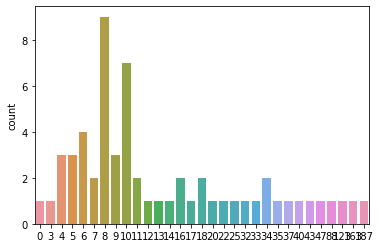

In [15]:
sns.countplot(data["visits"])

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data_classes = pd.read_csv('./visits/data/visits_Conference.owl_class_500.csv', header = 0, sep=",")
order = pd.read_csv('./visits/data/visits_Order_Conference.owl_class_500.csv', header = 0, sep=",")
ant = pd.read_csv('./visits/data/visits_ant_Conference.owl_class_500.csv', header = 0, sep=",")
data_classes.head()

,nodeNumber,node,visits,paths
0,0,Contribution_co-author,0,
1,1,Conference_www,9,Conference_www Conference_www Conference_www...
2,2,Active_conference_participant,10,Active_conference_participant Active_confere...
3,3,Contribution_1th-author,9,Contribution_1th-author Contribution_1th-aut...
4,4,Extended_abstract,18,Abstract Extended_abstract Abstract Extended...


In [17]:
order.head()


,nodeId,nodeName,nodeType,nodeLevel,loop,hop,path
0,35,Abstract,Class,-1,0,0,Abstract
1,4,Extended_abstract,Class,-1,0,1,Abstract Extended_abstract
2,52,Regular_contribution,Class,-1,0,2,Abstract Extended_abstract Regular_contribution
3,21,Written_contribution,Class,-1,0,3,Abstract Extended_abstract Regular_contributio...
4,41,Conference_contribution,Class,-1,0,4,Abstract Extended_abstract Regular_contributio...


In [18]:
ant.head()

,rootId,root,childId,child,incremental visits
35,Abstract,4,Extended_abstract,1,Abstract Extended_abstract
4,Extended_abstract,52,Regular_contribution,1,Abstract Extended_abstract Regular_contribution
52,Regular_contribution,21,Written_contribution,1,Abstract Extended_abstract Regular_contributio...
21,Written_contribution,41,Conference_contribution,1,Abstract Extended_abstract Regular_contributio...
41,Conference_contribution,49,Conference_document,1,Abstract Extended_abstract Regular_contributio...


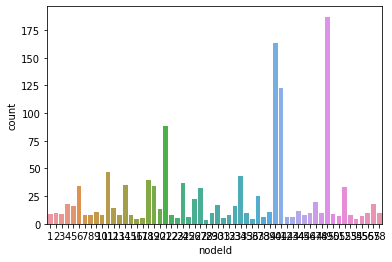

In [19]:
sns.countplot(order["nodeId"])

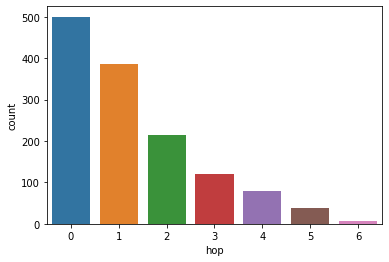

In [20]:
sns.countplot(order["hop"])

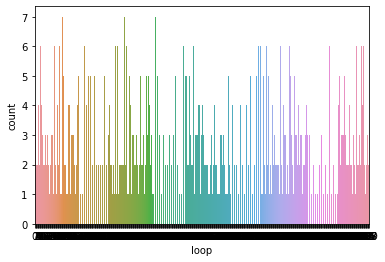

In [21]:
sns.countplot(order["loop"])

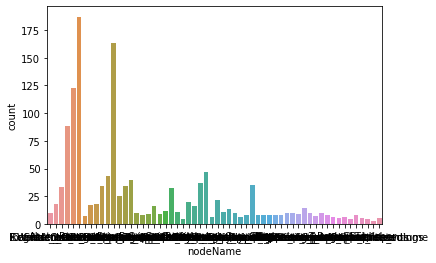

In [22]:
sns.countplot(order["nodeName"])

In [23]:
categories = list(data_classes.iloc[:,1:2])


In [24]:
data_classes['visits'].astype(int)

0       0
1       9
2      10
3       9
4      18
5      16
6      34
7       8
8       8
9      11
10      8
11     47
12     14
13      8
14     35
15      8
16      4
17      5
18     40
19     34
20     13
21     88
22      8
23      5
24     37
25      6
26     22
27     32
28      3
29     10
30     17
31      5
32      8
33     16
34     43
35     10
36      4
37     25
38      6
39     11
40    163
41    123
42      6
43      6
44     12
45      8
46     10
47     20
48     10
49    187
50      9
51      7
52     33
53      8
54      4
55      7
56     10
57     18
58     10
Name: visits, dtype: int64

In [25]:
vis = list(data_classes.iloc[:,2:3])


In [26]:
print(data_classes.iloc[:,2:3].sum().values)

[1346]


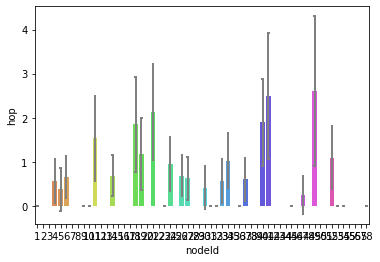

In [27]:
#sns.barplot(x = 'nodeId',  y='loop', hue = 'nodeId', data = order,

sns.barplot(x = 'nodeId',  y='hop', data = order,
            palette = 'hls',
            #order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [28]:
import numpy as np #pacote numérico usado na maioria das aplicações python


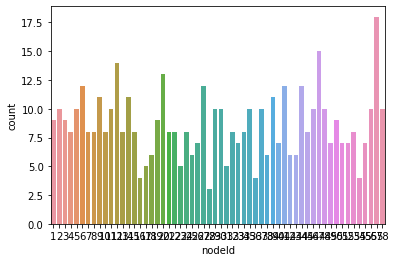

In [29]:
sns.countplot(x='nodeId', data=order[order.hop.isin([0])] )

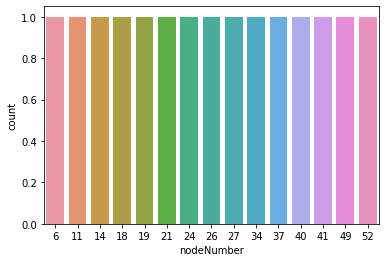

In [30]:
sns.countplot(x='nodeNumber', data=data_classes.query('visits > 21') ) #q75 node with more than 21 visits

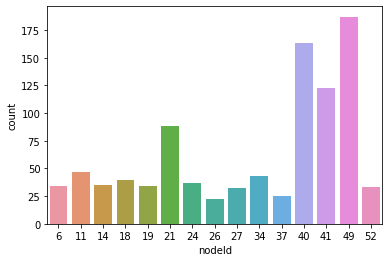

In [31]:
sns.countplot(x='nodeId', data=order.query('nodeId in [6,11,14,18,19,21,24,26,27,34,37,40,41,49,52]') ) #q75 node with more than 21 visits

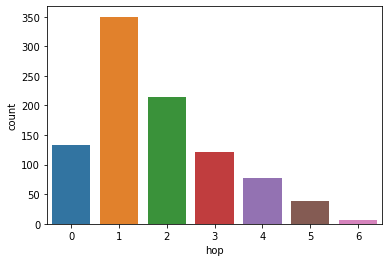

In [32]:
sns.countplot(x='hop', data=order.query('nodeId in [6,11,14,18,19,21,24,26,27,34,37,40,41,49,52]') ) #q75 node with more than 21 visits

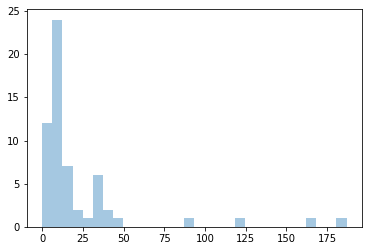

In [33]:
sns.distplot(visits_c,bins=30,kde=False)

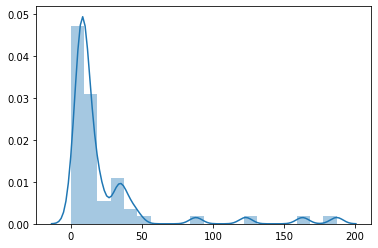

In [34]:
sns.distplot(visits_c, bins=20)

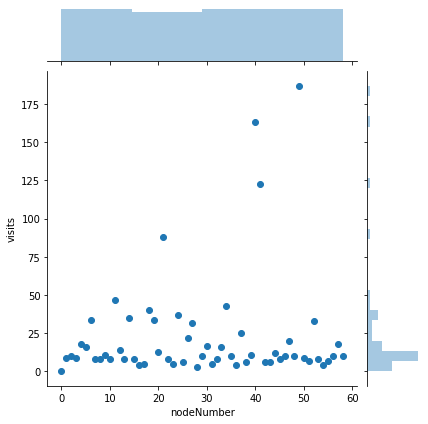

In [35]:
sns.jointplot(x="nodeNumber", y="visits", data=data_classes);

In [36]:
fieldnames=data_conceitos.keys()
fieldnames

dict_keys(['node_c', 'visit_c'])

In [37]:
import pandas
randomWalk = pandas.read_csv("./visits/data/visits_Conference.owl_class_500.csv")

In [38]:
randomWalk.head()

,nodeNumber,node,visits,paths
0,0,Contribution_co-author,0,
1,1,Conference_www,9,Conference_www Conference_www Conference_www...
2,2,Active_conference_participant,10,Active_conference_participant Active_confere...
3,3,Contribution_1th-author,9,Contribution_1th-author Contribution_1th-aut...
4,4,Extended_abstract,18,Abstract Extended_abstract Abstract Extended...


In [39]:
randomWalk.visits.mean()

22.8135593220339

In [40]:
randomWalk.visits.describe()

count     59.000000
mean      22.813559
std       35.229041
min        0.000000
25%        8.000000
50%       10.000000
75%       21.000000
max      187.000000
Name: visits, dtype: float64

In [41]:
q25 = randomWalk.quantile(0.25)
q25

nodeNumber    14.5
visits         8.0
Name: 0.25, dtype: float64

In [42]:
q75 = randomWalk.quantile(0.75)
q75

nodeNumber    43.5
visits        21.0
Name: 0.75, dtype: float64

In [43]:
np.median(randomWalk['visits'])

10.0

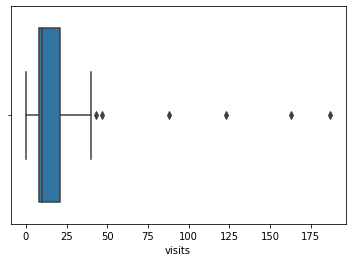

In [44]:
sns.boxplot(randomWalk.visits)

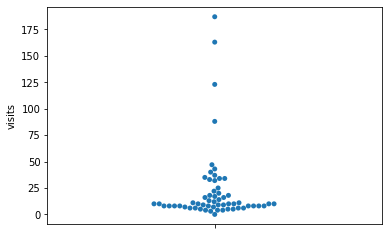

In [45]:
sns.swarmplot(randomWalk['visits'], orient="v")

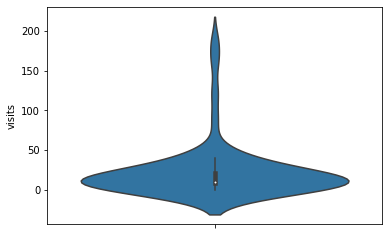

In [46]:
sns.violinplot(randomWalk['visits'], orient="v")

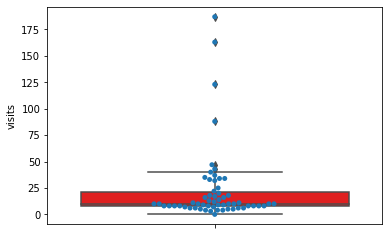

In [47]:
sns.swarmplot(randomWalk['visits'], orient="v")
sns.boxplot(randomWalk.visits, orient="v", color="red")

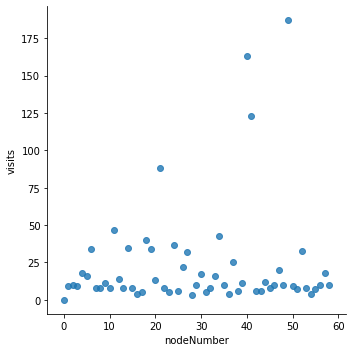

In [48]:
sns.lmplot( y="visits", x="nodeNumber", data=randomWalk, fit_reg=False)

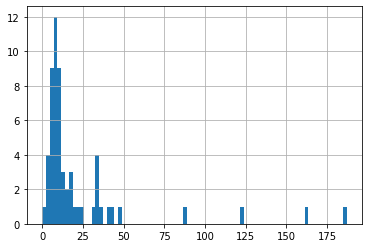

In [49]:
randomWalk.visits.hist(bins=80)


In [50]:
randomWalk.visits.mode()

0    8
dtype: int64

In [51]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    media = coluna.mean()
    mediana = coluna.median()
    if (media < mediana < moda):
        print("negativo")
    elif (media > mediana > moda):
        print("positivo")
    else:
        print("simetrico")

In [52]:
assimetria(randomWalk.visits)

positivo


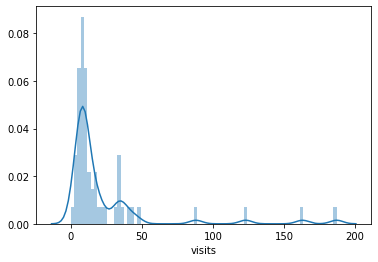

In [53]:
sns.distplot(randomWalk.visits, bins=80)

In [54]:
randomWalk.visits.max() - randomWalk.visits.min()

187

In [55]:
def variancia(lista):
    n = len(lista)
    mu = np.mean(lista)
    numerador = 0
    for i in lista:
        numerador += (i - mu)**2
    return numerador/n

In [56]:
variancia(randomWalk.visits)

1220.049985636311

In [57]:
randomWalk.visits.var()

1241.0853302162475

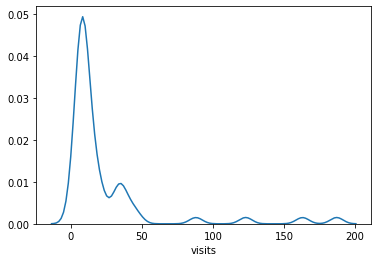

In [58]:
sns.distplot(randomWalk.visits, hist=False)

In [59]:
randomWalk.visits.std()

35.22904100619612

In [60]:
conf40 = order[order.nodeId.isin([40])]

In [61]:
conf40

,nodeId,nodeName,nodeType,nodeLevel,loop,hop,path
14,40,Person,Class,-1,4,1,Conference_contributor Person
18,40,Person,Class,-1,5,3,Paid_applicant Registeered_applicant Conferenc...
21,40,Person,Class,-1,7,1,Reviewer Person
31,40,Person,Class,-1,9,3,Contribution_1th-author Regular_author Confere...
43,40,Person,Class,-1,14,1,Conference_contributor Person
...,...,...,...,...,...,...,...
1299,40,Person,Class,-1,485,2,Registeered_applicant Conference_applicant Person
1301,40,Person,Class,-1,486,1,Committee_member Person
1315,40,Person,Class,-1,490,2,Invited_speaker Conference_contributor Person
1323,40,Person,Class,-1,492,1,Conference_applicant Person


In [62]:
conf_path = order.groupby(["nodeId","nodeName"]).count()

In [63]:
conf_path 


,,nodeType,nodeLevel,loop,hop,path
nodeId,nodeName,,,,,
1,Conference_www,9,9,9,9,9
2,Active_conference_participant,10,10,10,10,10
3,Contribution_1th-author,9,9,9,9,9
4,Extended_abstract,18,18,18,18,18
5,Accepted_contribution,16,16,16,16,16
6,Conference_part,34,34,34,34,34
7,Track,8,8,8,8,8
8,Paper,8,8,8,8,8
9,Track-workshop_chair,11,11,11,11,11


In [64]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

pd.options.display.max_seq_items = 2000
pd.options.display.max_colwidth = 90
pd.options.display.max_rows = 999

loggingFile = './experiment//TitleBody3GramTFIDF.txt'
binaryBodyTitle = './experiment/binaryBodyTitle.csv'
template = './experiment/dfTeste.csv'

In [65]:
data_classes.head()

,nodeNumber,node,visits,paths
0,0,Contribution_co-author,0,
1,1,Conference_www,9,Conference_www Conference_www Conference_www Conference_www Conference_www Conferenc...
2,2,Active_conference_participant,10,Active_conference_participant Active_conference_participant Active_conference_partic...
3,3,Contribution_1th-author,9,Contribution_1th-author Contribution_1th-author Contribution_1th-author Contribution...
4,4,Extended_abstract,18,Abstract Extended_abstract Abstract Extended_abstract Abstract Extended_abstract Ext...


In [66]:
#TF-ID
def run_tf_idf(data, configurationTFIDF, num_feature, tfIDFoutputFile):
    #we need to text max_feature with 10, 20, 25, 50 
    #, max_features=num_feature
    vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)
        
    tf_idf_results = vectorizer.fit_transform(data['paths'])

    features = vectorizer.get_feature_names()

    print(features)

    scores = (tf_idf_results.toarray())
    output_tf_idf = pd.DataFrame(scores)
    
    output_tf_idf = pd.concat([data['nodeNumber'], output_tf_idf], axis=1)

    output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


    # remove words occuring less than 5 times
    #tfidf = TfidfVectorizer(min_df=5)
    #you can also remove common words:

    # remove words occuring in more than half the documents
    #tfidf = TfidfVectorizer(max_df=0.5)
    #you can also remove stopwords like this:
    

In [67]:
run_tf_idf(data_classes, (1,1), 25, './visits/data/tfIDFConference.csv')

['abstract', 'accepted_contribution', 'camera_ready_contribution', 'chair', 'committee_member', 'conference_applicant', 'conference_contribution', 'conference_contributor', 'conference_document', 'conference_participant', 'early_paid_applicant', 'extended_abstract', 'invited_speaker', 'paid_applicant', 'paper', 'person', 'presentation', 'registeered_applicant', 'regular_author', 'regular_contribution', 'rejected_contribution', 'reviewed_contribution', 'submitted_contribution', 'track', 'written_contribution']


In [68]:
#analyzing frequency of TOP 50 terms

def analyze_top(data, termFrequencyTop50):
    docs = data['paths'].tolist()

    cv = CountVectorizer()
    cv_fit=cv.fit_transform(docs)

    #print(cv.get_feature_names())
    #print(cv_fit.toarray())

    word_list = cv.get_feature_names()   

    count_list = cv_fit.toarray().sum(axis=0)
    term_frequency = dict(zip(word_list,count_list))

    a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 

    top50 = a[:100]
    df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  

    print(df_frequency)

    df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

    sns.set(font_scale = 2)
    plt.figure(figsize=(18,17))
    plt.xticks(rotation=90)
    plt.title("Frequency of terms ")
    plt.ylabel('term', fontsize=20)
    plt.xlabel('frequency', fontsize=20)
    ax = sns.barplot(x="frequency", y="term", data=df_frequency)
    
    return docs


                              term  frequency
0             written_contribution        264
1          conference_contribution        246
2           submitted_contribution        188
3              conference_document        187
4            reviewed_contribution        185
5                           person        163
6             regular_contribution        132
7            registeered_applicant        102
8                   paid_applicant        100
9            accepted_contribution         96
10               extended_abstract         90
11          conference_contributor         86
12            conference_applicant         80
13           rejected_contribution         78
14                committee_member         64
15                        abstract         60
16                           chair         60
17                    presentation         51
18                  regular_author         48
19          conference_participant         44
20       camera_ready_contribution

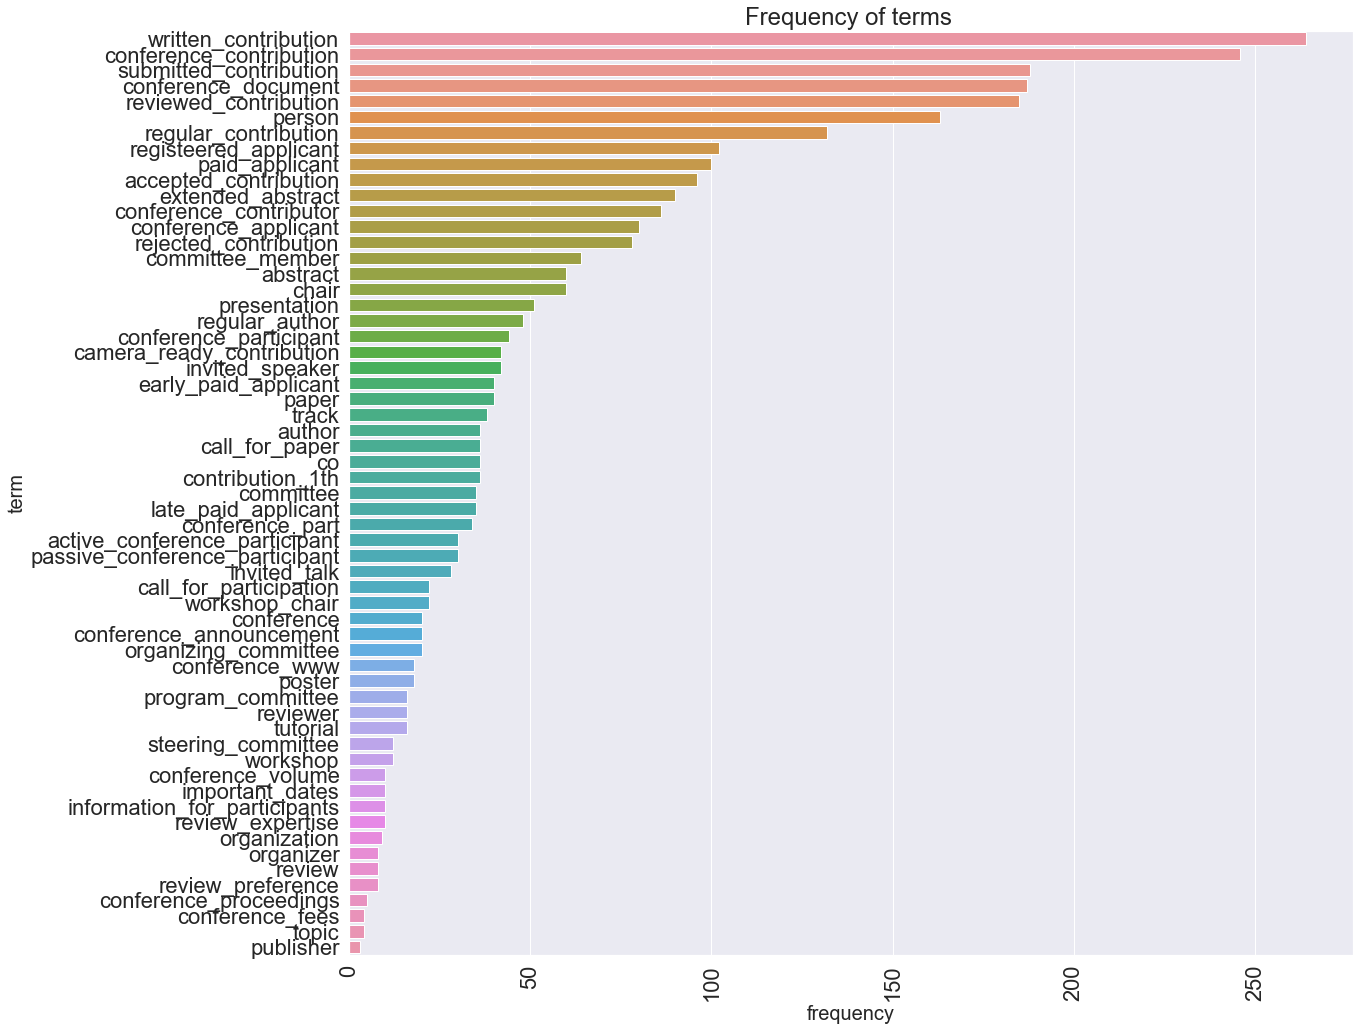

In [69]:
docs = analyze_top(data_classes, './visits/data/termFrequencyTop50Conference.csv')